scale (dist/pixel) =  11.67
units =  nm


Text(0.06,0.02,'a test string that is a little bit longer\nwith a newline')

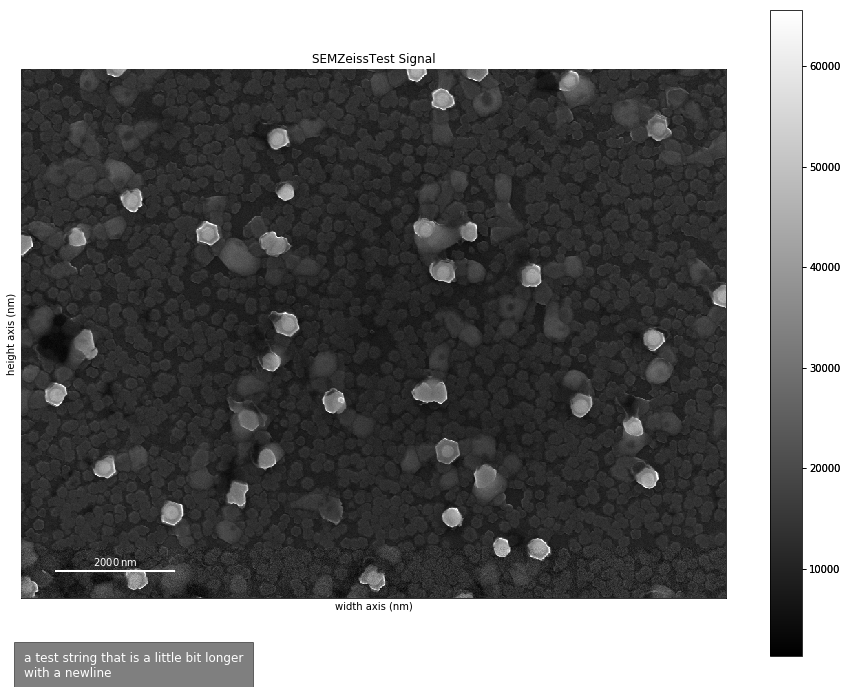

In [5]:
import hyperspy.api as hs
import numpy as np
import matplotlib
matplotlib.use('nbagg')

# switch off the too many warnings...
import warnings
warnings.filterwarnings('ignore')

s=hs.load('sampledata/SEMZeissTest.tif')


#if you want to look into the Zeiss metadata:
zeiss_meta = s.original_metadata['sem_metadata']

#hyperspy automatically infers the scaling of the images
print('scale (dist/pixel) = ',s.axes_manager[0].scale)
print('units = ',s.axes_manager[0].units)
aspect=s.axes_manager[0].size / s.axes_manager[1].size

# you can also use the gui to inspect the scale and change it
#s.axes_manager.gui() 

# note also the scalebar that appears:
#hs.plot.plot_images(s, axes_decor="off")
s.plot()

#increase the image size of a hyperspy plot
#call this after the plot is created, any other way?
fig = matplotlib.pyplot.gcf()
figsize=10
fig.set_size_inches(aspect*figsize,figsize)



#add text box
fig.text(0.06, 0.02, 'a test string that is a little bit longer\nwith a newline', fontsize=12,color='white',
        bbox={'facecolor':'black', 'alpha':0.5, 'pad':10})



s.

In [62]:
# make the metadata mor readable and iterable
tab=[]
for x in zeiss_meta :
    try :
        u = x[1][2]
    except:
        u=''
    tab.append((x[0],x[1][0],x[1][1],u))
    
import pandas as pd
from IPython.display import display

meta = pd.DataFrame(tab[1:-1])
meta.columns=['exifkey','parameter','value','unit']
#searching in the metadata:
display(meta[(meta.parameter.str.find('Mag')>=0)])

#display all:
pd.set_option('display.max_rows',30)
display(meta)



,exifkey,parameter,value,unit
36,ap_ar_mag,Argon Magnification,0,X
37,ap_ar_mag_factor,Argon Mag Factor,0,nm
132,ap_dual_mag_offset_x,Dual Mag Offset X,0.4,
133,ap_dual_mag_offset_y,Dual Mag Offset Y,0,
134,ap_dual_mag_slope,Dual Mag Gain X,204,
135,ap_dual_mag_y_slope,Dual Mag Gain Y,300,
192,ap_fib_mag_fine_gain_x,FIB Mag fine gain X,0,
193,ap_fib_mag_fine_gain_y,FIB Mag fine gain Y,0,
194,ap_fib_magnification,FIB Mag,0,X
296,ap_low_mag_focus,Low Mag Focus,1,


,exifkey,parameter,value,unit
0,ap_actualcurrent,Fil I,2.32,A
1,ap_actualext,Extractor V,4.36,kV
2,ap_actualkv,EHT,25,kV
3,ap_actuallens,Liner Tube,0,kV
4,ap_actualsupp,Suppressor V,270,V
5,ap_alias_wd,Focus,15.8,mm
6,ap_align1_x,Align 1 X,-1.8,%
7,ap_align1_y,Align 1 Y,-14.8,%
8,ap_angular_0,Aa 1,0,°
9,ap_angular_1,Aa 2,0,°


In [59]:
s.axes_manager[0].name

'width'

In [10]:
hs.preferences.gui()


VBox(children=(Tab(children=(VBox(children=(HBox(children=(Label(value='Expand structures in DictionaryTreeBrowser', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Automatic logging (requires IPython)', layout=Layout(width='auto')), Checkbox(value=False)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Logging level', layout=Layout(width='auto')), Dropdown(index=2, options=('CRITICAL', 'ERROR', 'WARNING', 'INFO', 'DEBUG'), value='WARNING')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Nb progressbar', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Parallel', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Show progress bar', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')))), VBox(children=(HBox(children=(Label(value='Enable ipywidgets gui', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Enable traitsui gui', layout=Layout(width='auto')), Checkbox(value=True)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')))), VBox(children=(HBox(children=(Label(value='GOS directory', layout=Layout(width='auto')), Text(value='/home/ks/.hyperspy/EELS_GOS')), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')),)), VBox(children=(HBox(children=(Label(value='Azimuth angle', layout=Layout(width='auto')), FloatText(value=0.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Elevation angle', layout=Layout(width='auto')), FloatText(value=35.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Energy resolution at Mn Ka (eV)', layout=Layout(width='auto')), FloatText(value=130.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between')), HBox(children=(Label(value='Stage tilt', layout=Layout(width='auto')), FloatText(value=0.0)), layout=Layout(display='flex', flex_flow='row', justify_content='space-between'))))), _titles={'3': 'EDS', '0': 'General', '2': 'EELS', '1': 'GUIs'}), Button(description='Save', style=ButtonStyle(), tooltip='Make changes permanent')))